# Сборный проект: интернет-магазин "Стримчик"

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План работы над проектом:**

**Шаг 1. Открыть файл с данными и изучить общую информацию**

**Шаг 2. Подготовить данных**

* Заменить названия столбцов (привести к нижнему регистру)
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменил тип данных и почему
* Обработать пропуски при необходимости:
    * Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать
    * Описать причины, которые могли привести к пропускам
    * Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

**Шаг 3. Провести исследовательский анализ данных**

* Сколько игр выпускалось в разные годы
* Как менялись продажи по платформам.
* Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
* Посмотреть на общее распределение игр по жанрам.

**Шаг 4. Составить портрет пользователя каждого региона**

Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Описать различия в долях продаж.
* Самые популярные жанры (топ-5). Пояснить разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверить гипотезы**

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные

Пояснить:
* Как сформулировал нулевую и альтернативную гипотезы
* Какой критерий применилидля проверки гипотез и почему

**Шаг 6. Написать общий вывод**

## Откроем файл с данными и изучим общую информацию

Подключим библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

Загрузим данные

In [3]:
df_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

# общая информация
df_games.info()

# первые 10 строк
df_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Узнаем уникальные значения по каждому столбцу

In [4]:
for column in df_games.columns:
    print(column)
    print(df_games[column].unique())
    print()

Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.06

Пропуски

In [5]:
# общее количество
display(df_games.isna().sum())

# в процентах
pd.DataFrame(round(df_games.isna().mean().round(2) *100,)).style.background_gradient('coolwarm')

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [6]:
# по 2 пропуска в имени и жанре, проверим
display(df_games[df_games['Name'].isna()])
display(df_games[df_games['Genre'].isna()])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки 659 и 14244

In [7]:
df_games['Name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

In [8]:
df_games[df_games['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df_games[df_games['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df_games[df_games['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df_games[df_games['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [12]:
df_games[df_games['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Первые выводы**

Типы переменных:

1. Категориальный: Name, Platform, Genre, Rating.
2. Количественный: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.

User_Score отнесен к количественной переменной: "to be defined" - рейтинг еще не известен (отсутсвие оценки на момент выгрузки)

Аномалии:

* Пропуски по столцам Name и Genre совпадают
* Пропуски по столбцам Year_of_Release, Critic_Score, User_Score, Rating
* Аномалия tbd ("to be defined")
* Дубликаты по имени

## Подготовим данные

Создадим **рабочий** датафрейм

In [14]:
data = df_games

Приведем названия столбцов в нижний регистр

In [15]:
data.columns = [x.lower() for x in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В глаза сразу бросается:
* year_of_release - год, целое число, int
* user_score - float

Изменим тип по ходу работы с пропусками

**Проверим на наличие дубликатов**

In [16]:
data.duplicated().sum()

0

**Обработаем пропуски**

In [17]:
display(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удаляем **name** - их количество ничтожно мало

In [18]:
print('Процент пропусков, name:', '{:.2%}'.format(data['name'].isna().mean()))

Процент пропусков, name: 0.01%


In [19]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Аналогично поступаем с **year_of_release**

In [20]:
print('Процент пропусков, year_of_release:', '{:.2%}'.format(data['year_of_release'].isna().mean()))

Процент пропусков, year_of_release: 1.61%


In [21]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Изменим тип данных на int: указан только год выхода для каждой из игр

In [22]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [23]:
print('До удаления, строк', df_games.shape[0])
print('После удаления, строк', data.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format((df_games.shape[0] - data.shape[0]) / df_games.shape[0]))

До удаления, строк 16715
После удаления, строк 16444
Процент удаленных данных: 1.62%


In [24]:
display(data.isna().sum())
print('Процент пропусков, critic_score:', '{:.2%}'.format(data['critic_score'].isna().mean()))
print('Процент пропусков, user_score:', '{:.2%}'.format(data['user_score'].isna().mean()))
print('Процент пропусков, rating:', '{:.2%}'.format(data['rating'].isna().mean()))

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Процент пропусков, critic_score: 51.45%
Процент пропусков, user_score: 40.17%
Процент пропусков, rating: 40.60%


**user_score**: найденная аббревиатура 'tbd' означает **to be defined**, т.е. оценка игре еще не проставлена - заменим на NaN и приведем к типу float

In [25]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Узнаем как обстоят дела с пропусками

In [26]:
display(data.isna().sum())
print('Процент пропусков, critic_score:', '{:.2%}'.format(data['critic_score'].isna().mean()))
print('Процент пропусков, user_score:', '{:.2%}'.format(data['user_score'].isna().mean()))
print('Процент пропусков, rating:', '{:.2%}'.format(data['rating'].isna().mean()))

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Процент пропусков, critic_score: 51.45%
Процент пропусков, user_score: 54.62%
Процент пропусков, rating: 40.60%


Пропуски в **critic_score** и **user_score** заполнять некорректно: можно попробовать использовать связь с наименованием игры, но это может существенно понизить качество данных

**rating**

In [27]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board:
* «E» — Для всех
* «M» — Для взрослых
* «T» — Подросткам
* «E10+» — Для всех от 10 лет и старше
* «K-A» - старый вариант маркировки E
* «AO» — Только для взрослых
* «EC» — Для детей младшего возраста
* «RP» — Рейтинг ожидается

1. Заменим пропуски и RP на Unknown
2. Заменим K-A на E

In [28]:
data['rating'] = data['rating'].fillna('Unknown')
data['rating'] = data['rating'].replace('RP', 'Unknown')
data['rating'] = data['rating'].replace('K-A', 'E')

In [29]:
data['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [30]:
display(data.isna().sum())
data.info()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [31]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


## Проведем исследовательский анализ данных

**Cколько игр выпускалось в разные годы и важны ли данные за все периоды**

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


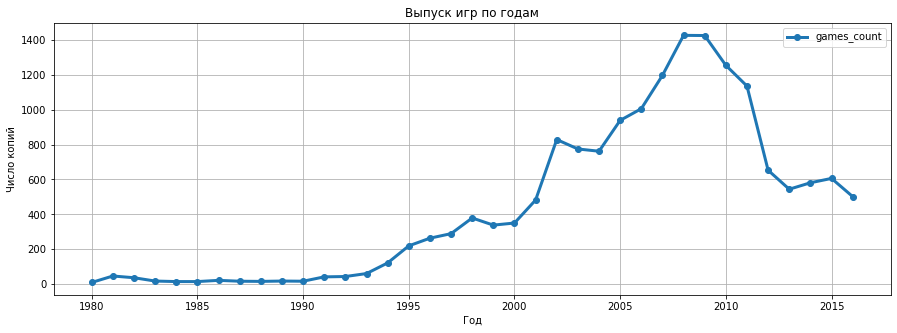

In [32]:
year_of_release_pivot_table = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
display(year_of_release_pivot_table)
year_of_release_pivot_table.plot(grid=True, style='o-', figsize=(15, 5), linewidth=3, title='Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Число копий')
plt.show()

1. Данные по всем периодам не важны

2. 1980-2008: наблюдается увеличение количества выпускаемых игр ввиду общего технологического прорыва (персональные компьютеры, игровые консоли)

3. 2008-2016: застой и дальнейший спад по причине мирового экономического кризиса 2008 года

**Как менялись продажи по платформам**

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


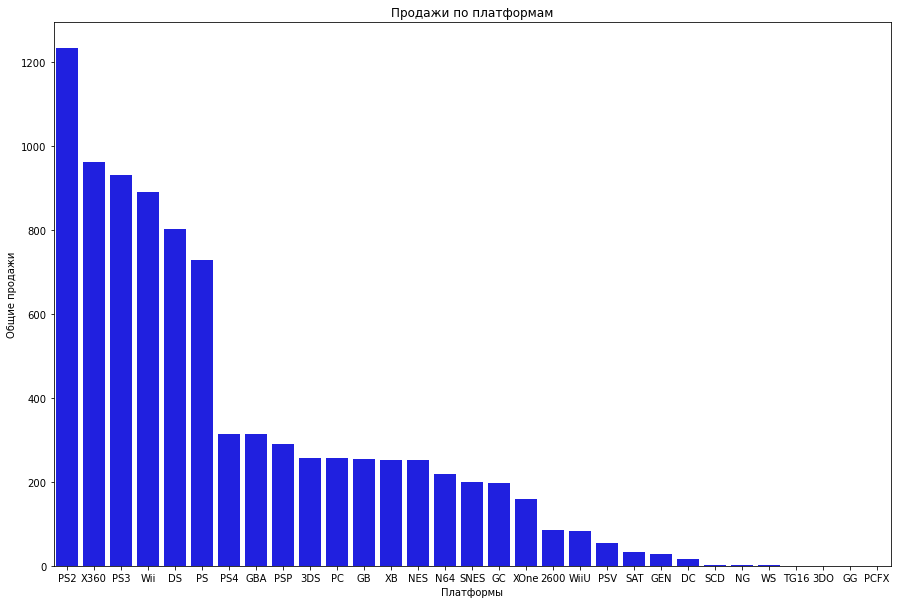

In [33]:
platform_sales_pivot_table = pd.pivot_table(
    data, index=['platform'], values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
display(platform_sales_pivot_table)
plt.figure(figsize=(15, 10))

(
    sns.barplot(data = platform_sales_pivot_table, x = platform_sales_pivot_table.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по платформам')
)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

В топ 6 конкурентов среди продаж вошли:
* PlayStation 2
* Xbox360
* PlayStation 3
* Nintendo Wii
* Nintendo DS
* PlayStation

Рассмотрим статистику продаж для этих платформ по годам

PS2


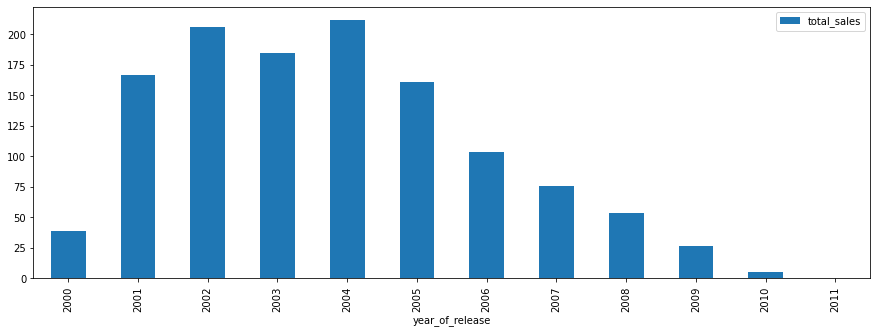

X360


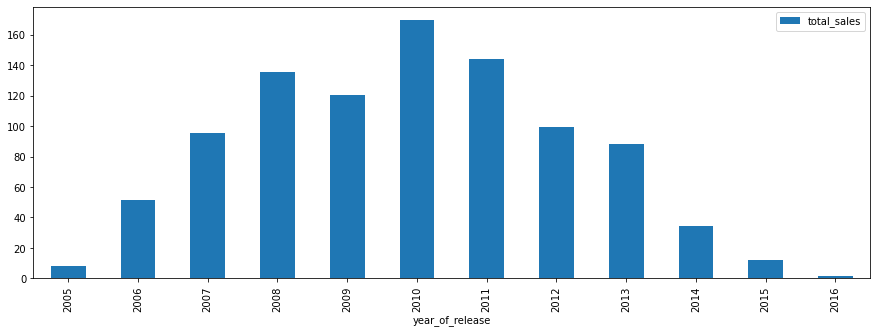

PS3


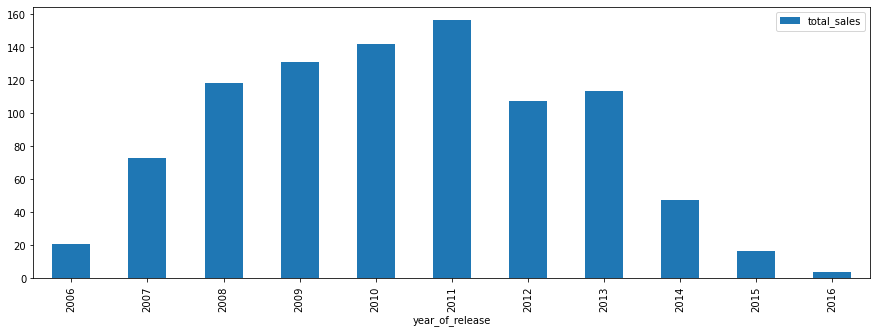

Wii


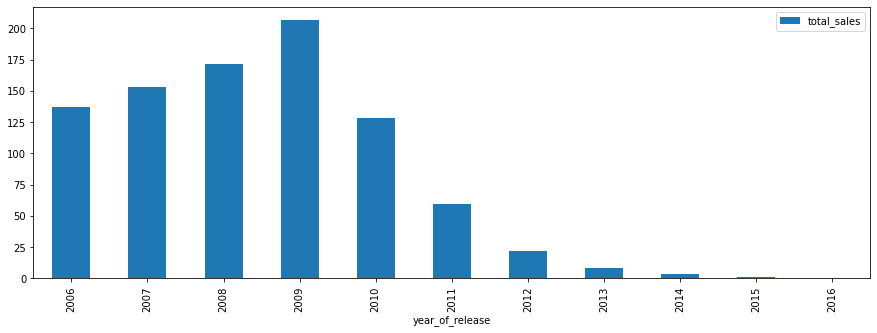

DS


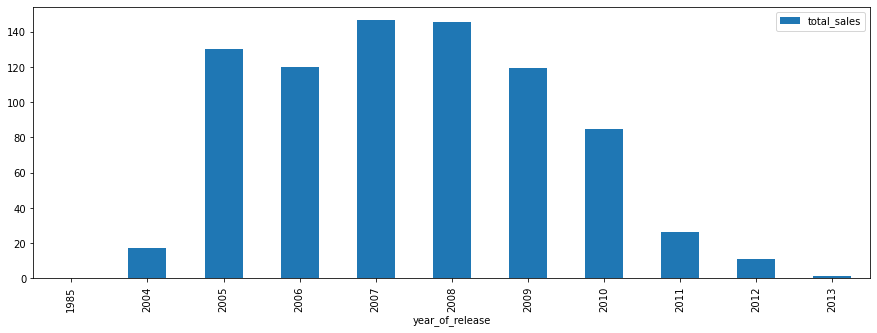

PS


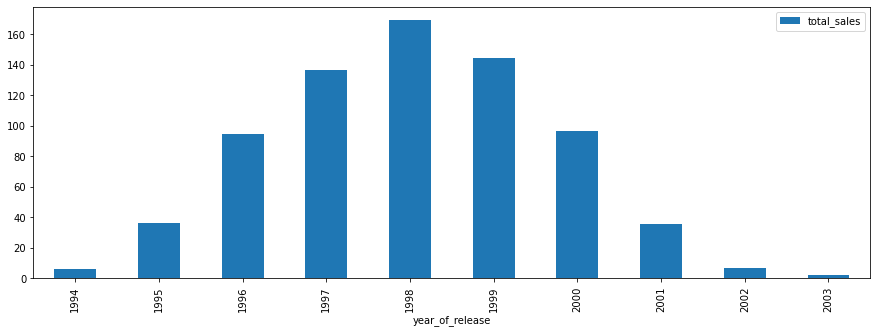

In [34]:
for platform in platform_sales_pivot_table.index[:6]:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', figsize=(15,5))
    )
    plt.show()

Успешные годы:
* PS2: 2001 - 2005
* Xbox360: 2008 - 2011
* PlayStation 3: 2008 - 2011
* Nintendo Wii: 2006 - 2009
* Nintendo DS: 2005 - 2009
* PlayStation: 1997 - 1999

Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются.

In [35]:
life_of_platform = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').count()

# уберем персональные компьютеры, т.к. данные по нему для нас аномалия
life_of_platform = life_of_platform.drop('PC')

# display(life_of_platform)
print('Среднее время жизни платформы:',life_of_platform.mean())


Среднее время жизни платформы: 7.066666666666666


**Актуальными данными** будем считать данные за последние 5 лет, начиная с 2012 года: этого периода в игровой индустрии достаточно для смены старого поколения консолей, обновления технических характеристик и актуализации популярных жанров

In [36]:
actual_data = data.query('year_of_release >= 2012')
actual_data.info()
display(actual_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1574
user_score         1355
rating                0
total_sales           0
dtype: int64

**Какие платформы лидируют по продажам, растут или падают**

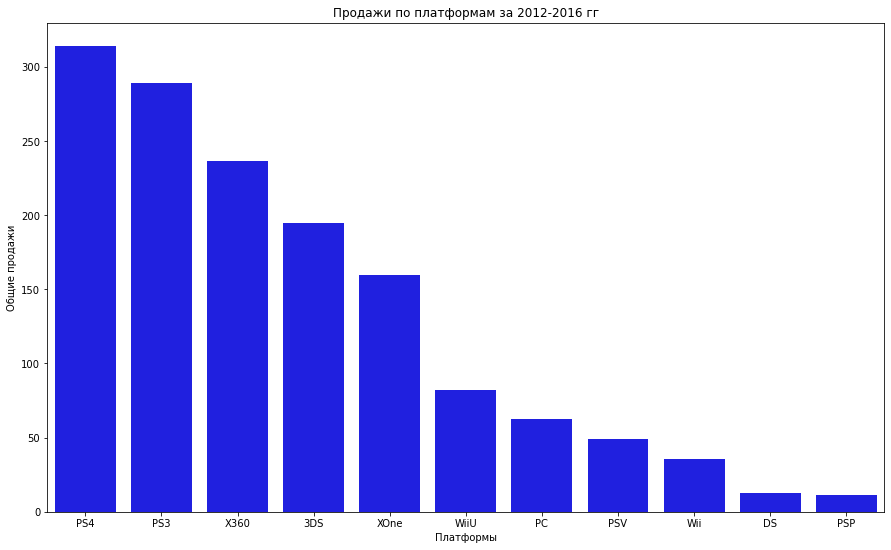

In [37]:
actual_platform_sales = (
    actual_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)

plt.figure(figsize=(15, 9))

(
    sns.barplot(data = actual_platform_sales, x = actual_platform_sales.index, y = 'total_sales', color = 'blue')
    .set(title = 'Продажи по платформам за 2012-2016 гг')
)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

Бесспорными лидерами в индустрии остаются платформы от Sony: PlayStation 3 и PlayStation 4:
* выход PS3 в Японии состоялся 11 ноября 2006 года, 17 ноября приставка появилась в Северной Америке в первом квартале 2007 года, в марте 2007 года — в Европе, а через несколько месяцев в России
* продажи PS4 начались в ноябре 2013 года в США, Европе, Южной Америке, России и Австралии и в феврале 2014 года в Японии

Далее следует продукция Microsoft:
* Xbox 360: официально анонсирована 12 мая 2005 года,
* Xbox One: анонс состоялся 21 мая 2013 года

Почему в ТОПе Sony и Microsoft:

большинство игровых компаний ориентируются на выпуск своей продукции чаще только именно для платформ этих производителей, поэтому новые модели PlayStation и Xbox и есть потенциально прибыльные

На данный момент это:
1. Sony PlayStation 4
2. Microsoft Xbox One

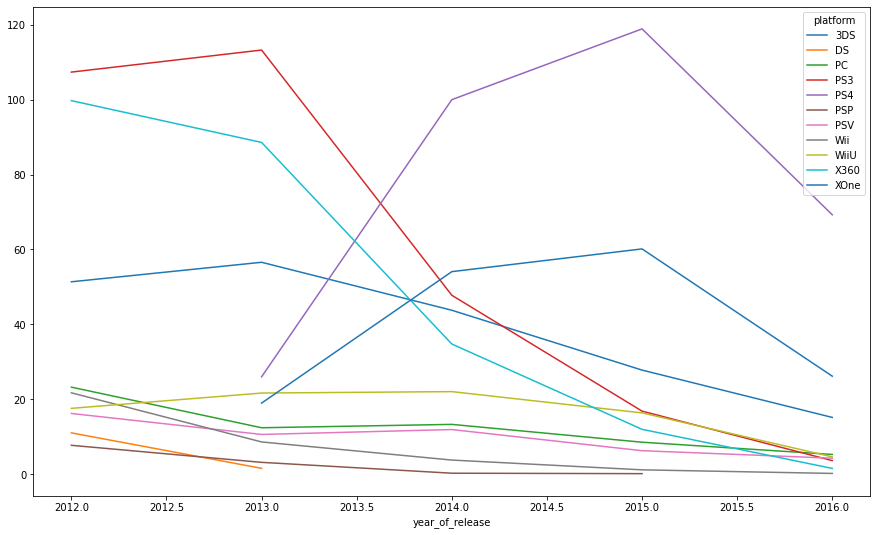

In [38]:
actual_data.pivot_table(index='platform',
                        columns='year_of_release',
                        values='total_sales',
                        aggfunc='sum').T.plot(figsize=(15,9))

plt.show()

Рост в 2013-2015 года наблюдается у:
* PlayStation 4
* Xbox One
* PC
* Wii U

Начиная с 2015 года продажи на всех консолях падают

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам**

In [39]:
actual_games = actual_data.query('platform in ["PS4", "PS3", "X360", "3DS", "XOne"]')
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16401,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16403,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16406,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16420,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


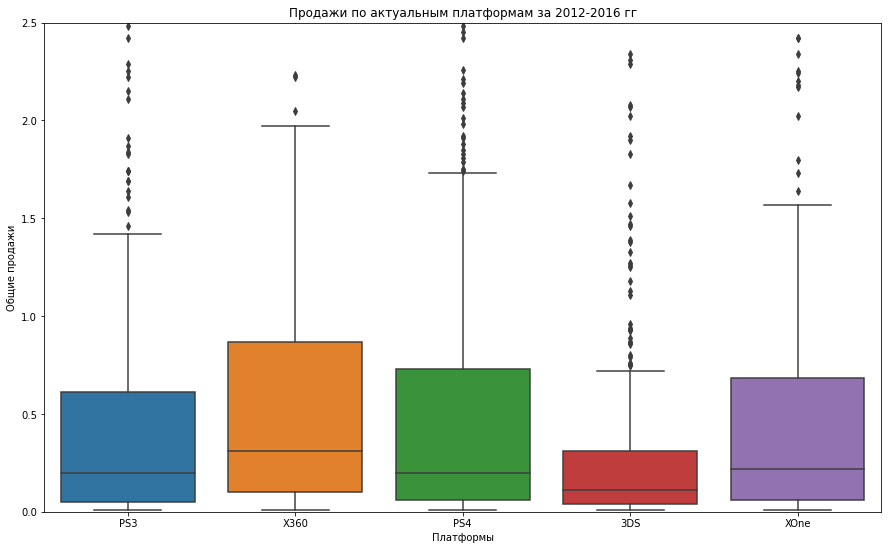

In [40]:
 plt.figure(figsize=(15, 9))
(
    sns.boxplot(data = actual_games, y = 'total_sales', x='platform')
    .set(title = 'Продажи по актуальным платформам за 2012-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2.5))
)
plt.show()

In [41]:
# общие продажи
actual_games['total_sales'].describe()

count    1820.000000
mean        0.655714
std         1.477562
min         0.010000
25%         0.060000
50%         0.190000
75%         0.630000
max        21.050000
Name: total_sales, dtype: float64

In [42]:
PS3_actual_games = actual_data.query('platform == "PS3"')
PS3_actual_games['total_sales'].describe()

count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64

In [43]:
X360_actual_games = actual_data.query('platform == "X360"')
X360_actual_games['total_sales'].describe()

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: total_sales, dtype: float64

In [44]:
PS4_actual_games = actual_data.query('platform =="PS4"')
PS4_actual_games['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [45]:
_3DS_actual_games = actual_data.query('platform == "3DS"')
_3DS_actual_games['total_sales'].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64

In [46]:
XOne_actual_games = actual_data.query('platform == "XOne"')
XOne_actual_games['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

**Средняя выручка на игру по платформе (тысяч копий):**
* 656 - Общая
* 810 - X360
* 801 - PS4
* 645 - XOne
* 586 - PS3
* 491 - 3DS

**Максимальная выручка на игру по платформе (миллионов копий):**
* 21,05 - PS3
* 16,27 - X360
* 14,63 - PS4
* 14,6 - 3DS
* 7,39 - XOne

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Возьмем для анализа Sony PlayStation 4

In [47]:
PS4_ratings = PS4_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]
display(PS4_ratings)
display(PS4_ratings.info())
display(PS4_ratings.isna().sum())

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7
...,...,...,...
16230,0.01,69.0,7.5
16233,0.01,NaN,NaN
16255,0.01,61.0,7.9
16259,0.01,51.0,5.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16314
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_sales   392 non-null    float64
 1   critic_score  252 non-null    float64
 2   user_score    257 non-null    float64
dtypes: float64(3)
memory usage: 12.2 KB


None

total_sales       0
critic_score    140
user_score      135
dtype: int64

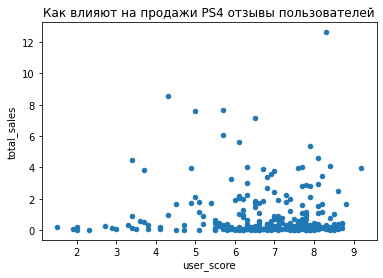

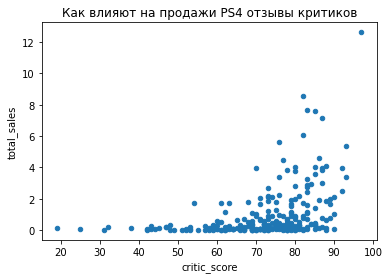

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [48]:
PS4_ratings.plot(x='user_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи PS4 отзывы пользователей')
plt.show()

PS4_ratings.plot(x='critic_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи PS4 отзывы критиков')
plt.show()

PS4_ratings.corr()

Судя по графикам и корреляции:
* влияние оценки критиков на продажи игр для Sony PlayStation 4 **умеренное** (0,406)
* оценка пользователей на продажу не влияет

Возможно, показатели оказались таковыми ввиду пропусков в оценках нашего датафрейма

Посмотрим аналогичные графики на примере PlayStation 3

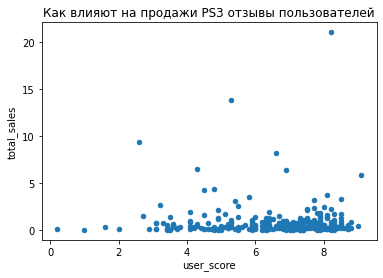

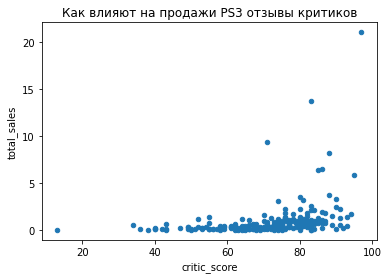

,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


In [49]:
PS3_ratings = PS3_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]

PS3_ratings.plot(x='user_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи PS3 отзывы пользователей')
plt.show()

PS3_ratings.plot(x='critic_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи PS3 отзывы критиков')
plt.show()

PS3_ratings.corr()

Тенденции сохраняются

Посмотрим на оставшиеся актуальные платформы: Xbox 360, Xbox One и 3DS


Microsoft Xbox 360


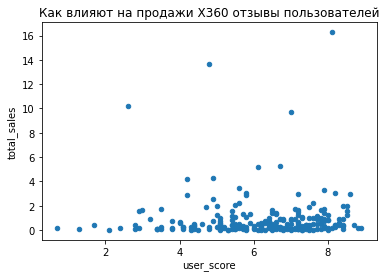

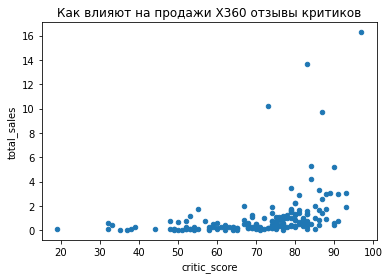

,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000



Microsoft Xbox One


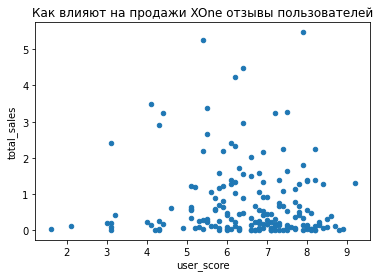

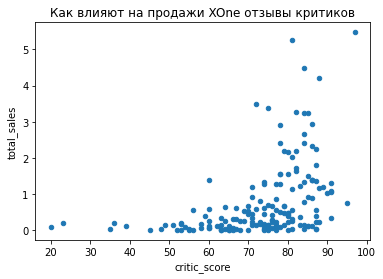

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000



Nintendo 3DS


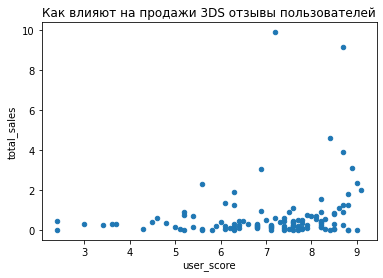

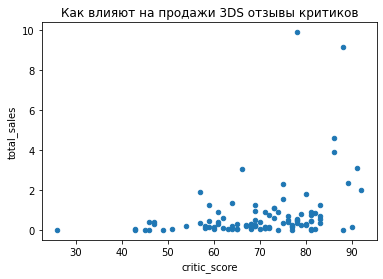

,total_sales,critic_score,user_score
total_sales,1.000000,0.320803,0.197583
critic_score,0.320803,1.000000,0.722762
user_score,0.197583,0.722762,1.000000


In [50]:
print()
print('Microsoft Xbox 360')

X360_ratings = X360_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]

X360_ratings.plot(x='user_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи X360 отзывы пользователей')
plt.show()

X360_ratings.plot(x='critic_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи X360 отзывы критиков')
plt.show()

display(X360_ratings.corr())

print()
print('Microsoft Xbox One')

XOne_ratings = XOne_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]

XOne_ratings.plot(x='user_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи XOne отзывы пользователей')
plt.show()

XOne_ratings.plot(x='critic_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи XOne отзывы критиков')
plt.show()

display(XOne_ratings.corr())

print()
print('Nintendo 3DS')

_3DS_ratings = _3DS_actual_games.loc[:,['total_sales', 'critic_score', 'user_score']]

_3DS_ratings.plot(x='user_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи 3DS отзывы пользователей')
plt.show()

_3DS_ratings.plot(x='critic_score', y='total_sales', kind='scatter', 
                 title = 'Как влияют на продажи 3DS отзывы критиков')
plt.show()

display(_3DS_ratings.corr())

Как видим, на всех платформах заметны:
* умеренная корреляционная связь между продажами и оценками критиков
* слабая связь продаж и оценок игроков

**Общее распределение игр по жанрам**

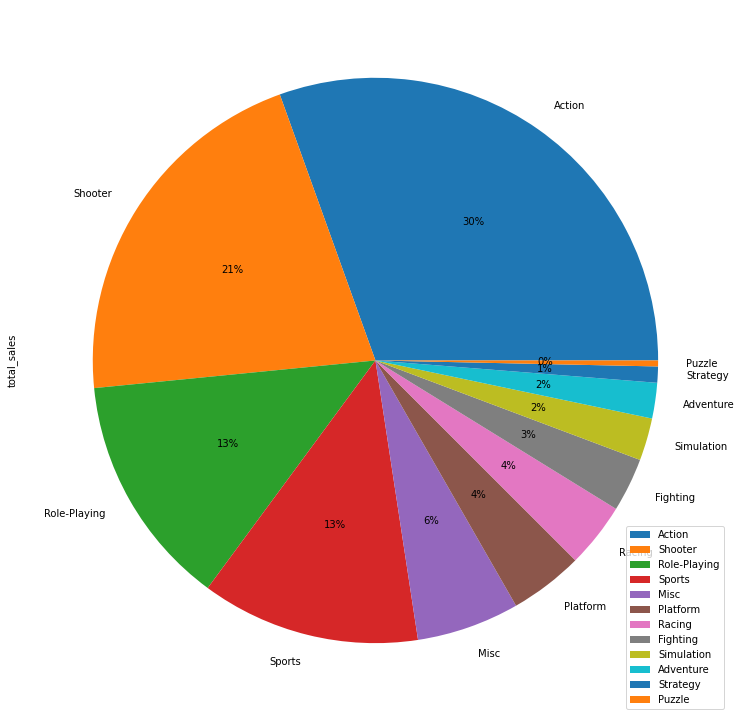

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07


In [51]:
(
    actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(ascending=False, by='total_sales').plot.pie(figsize=(13,13), y='total_sales', autopct='%1.0f%%')
)
plt.show()

(
    actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(ascending=False, by='total_sales').head(4)
)

Самые прибыльные игры для выбранного отрезка времени:
* Action - 30%
* Shooter - 21%
* Role-Playing - 13%
* Sports - 13%

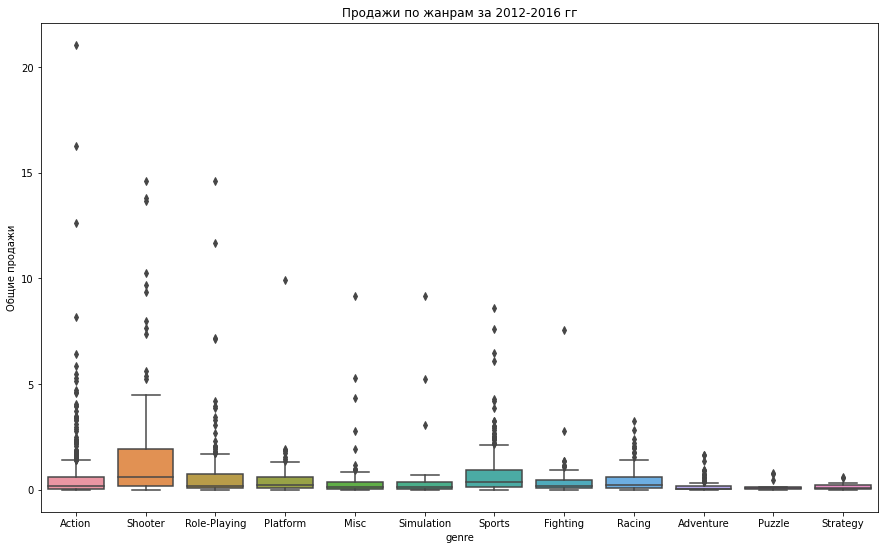

In [52]:
plt.figure(figsize=(15, 9))
(
    sns.boxplot(data = actual_games, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам за 2012-2016 гг', 
         ylabel = 'Общие продажи')
)
plt.show()

In [53]:
actual_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,910.000000,1071.000000,1820.000000
mean,2014.047253,0.275055,0.228956,0.077445,0.074258,71.707692,6.567414,0.655714
std,1.389891,0.668020,0.608755,0.281539,0.200763,13.076665,1.543885,1.477562
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,65.000000,5.700000,0.060000
50%,2014.000000,0.060000,0.040000,0.010000,0.020000,74.000000,6.900000,0.190000
75%,2015.000000,0.260000,0.200000,0.060000,0.062500,81.000000,7.750000,0.630000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.200000,21.050000


Наблюдаем заметные выбросы по каждому из жанров: среднее значение не подходит, используем медиану

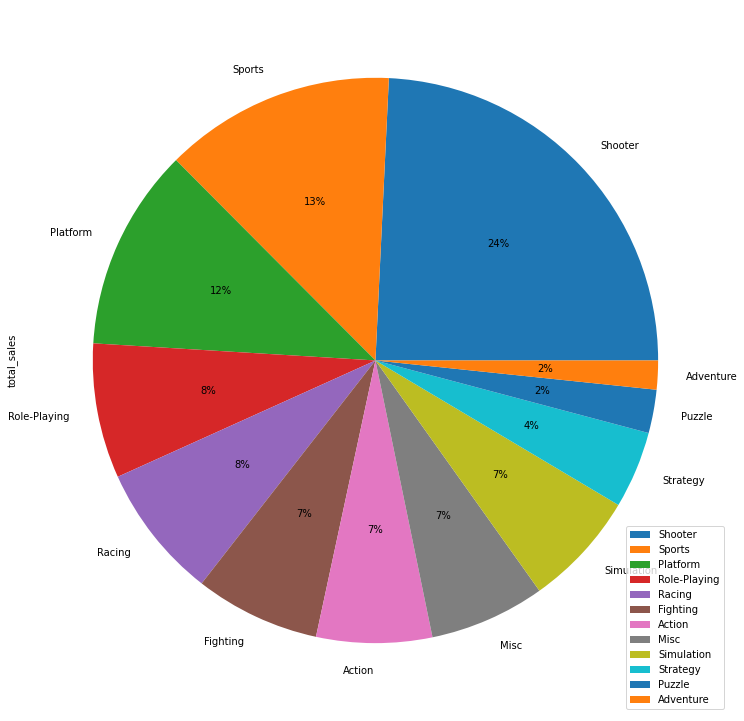

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


In [54]:
(
    actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(ascending=False, by='total_sales').plot.pie(figsize=(13,13), y='total_sales', autopct='%1.0f%%')
)
plt.show()

(
    actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(ascending=False, by='total_sales')# .head(4)
)

Cамыми прибыльными жанрами считаются
* **shooter** (24%)
* **sports** (13%)
* **platform** (12%)

## Составим портрет пользователя каждого региона

**Северная Америка**

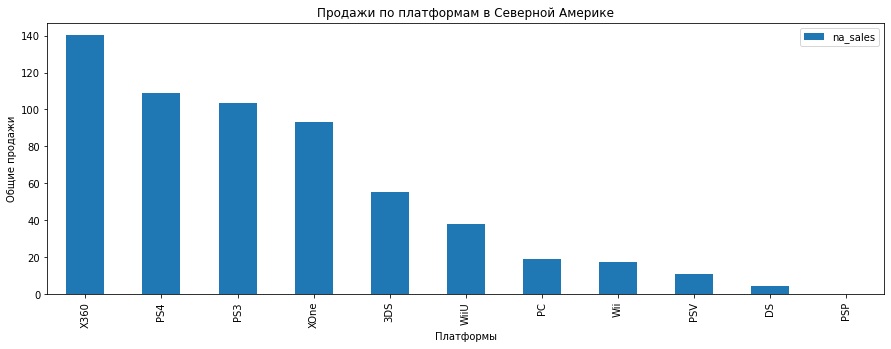

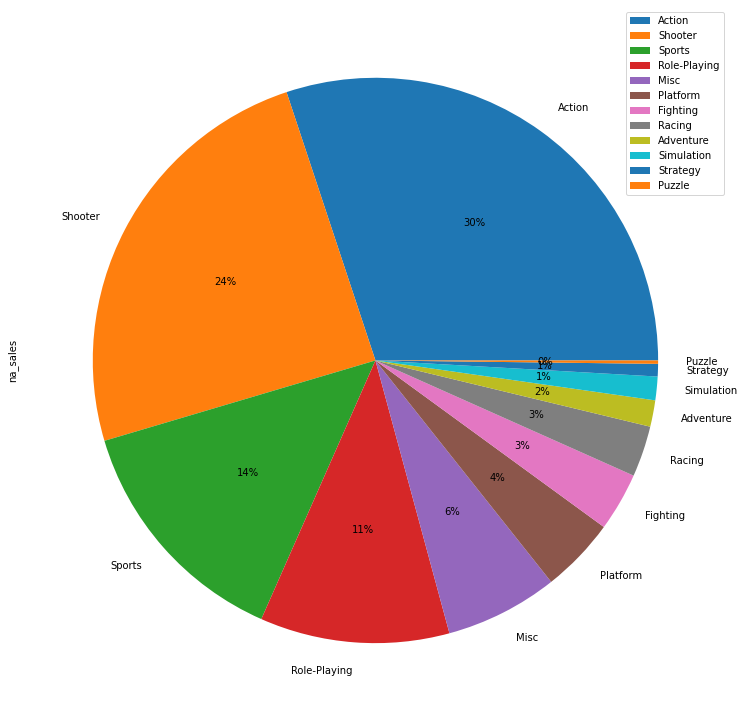

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


In [55]:
(
    actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(ascending=False, by='na_sales')
    .plot(kind='bar', figsize=(15,5), title = 'Продажи по платформам в Северной Америке')
)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

(
    actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(ascending=False, by='na_sales').plot.pie(figsize=(13,13), y='na_sales', autopct='%1.0f%%')
)
plt.show()

(
    actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(ascending=False, by='na_sales')
)

**ТОП-5 платформ**
1. Xbox 360
2. PlayStation 4
3. PlayStation 3
4. Xbox One
5. Nintendo 3DS

**ТОП-5 жанров**
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

**Европа**

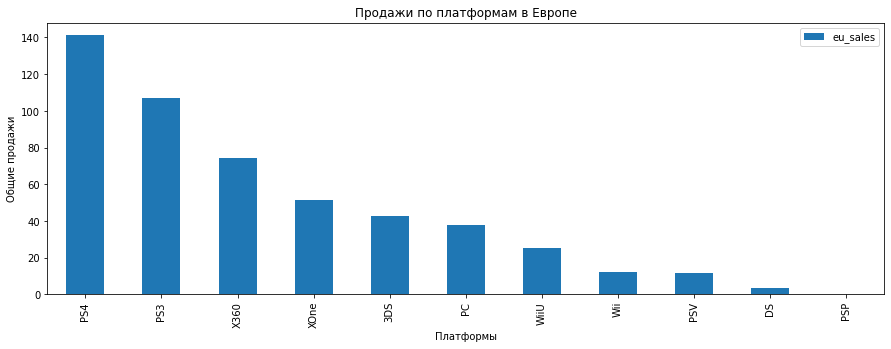

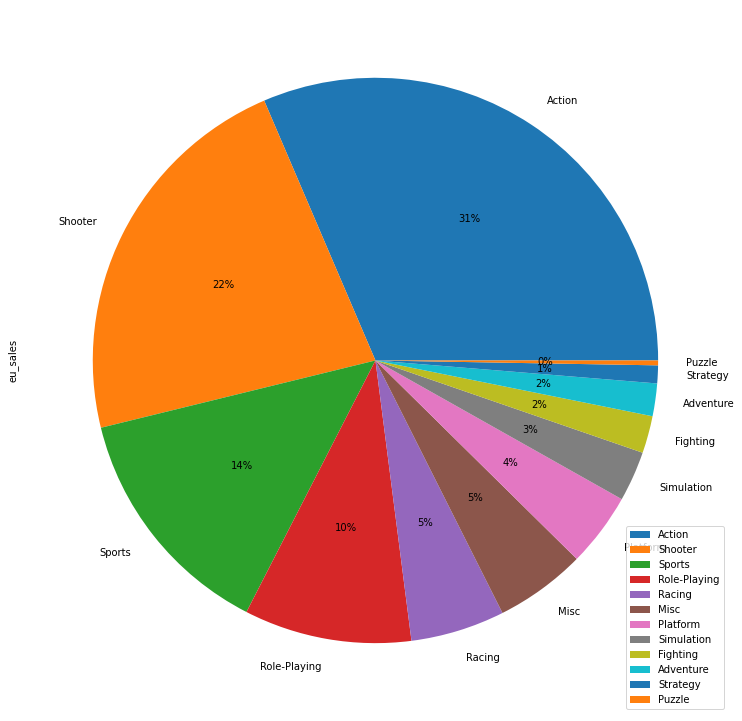

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


In [56]:
(
    actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(ascending=False, by='eu_sales')
    .plot(kind='bar', figsize=(15,5), title = 'Продажи по платформам в Европе')
)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

(
    actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(ascending=False, by='eu_sales').plot.pie(figsize=(13,13), y='eu_sales', autopct='%1.0f%%')
)
plt.show()

(
    actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(ascending=False, by='eu_sales')
)

**ТОП-5 платформ**
1. PlayStation 4
2. PlayStation 3
3. Xbox 360
4. Xbox One
5. Nintendo 3DS

**ТОП-5 жанров**
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

**Япония**

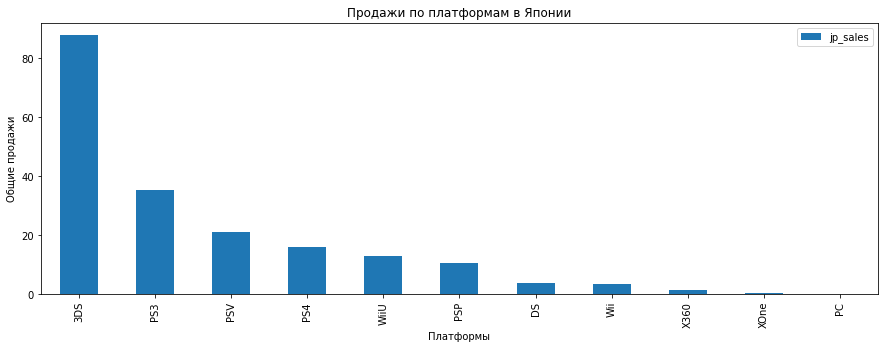

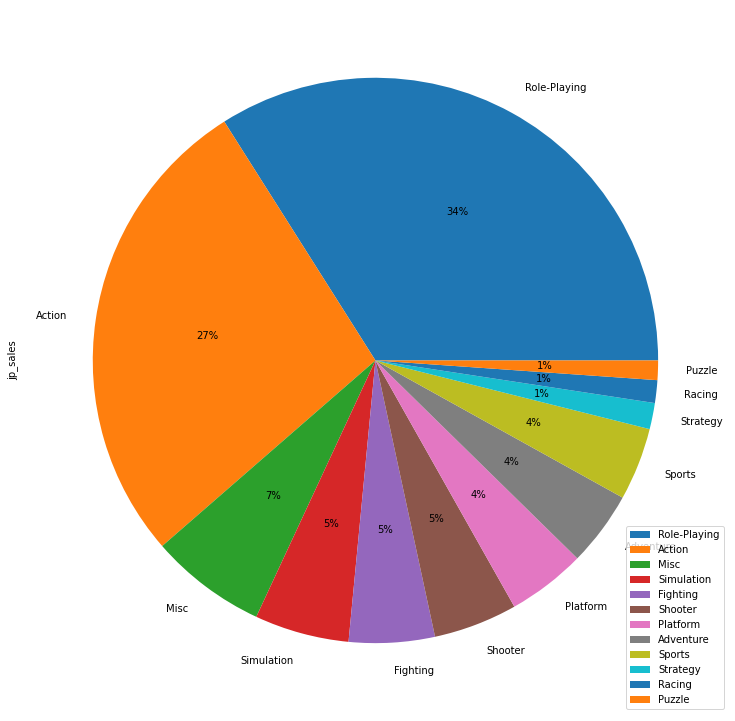

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


In [57]:
(
    actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(ascending=False, by='jp_sales')
    .plot(kind='bar', figsize=(15,5), title = 'Продажи по платформам в Японии')
)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

(
    actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(ascending=False, by='jp_sales').plot.pie(figsize=(13,13), y='jp_sales', autopct='%1.0f%%')
)
plt.show()

(
    actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(ascending=False, by='jp_sales')
)

**ТОП-5 платформ**
1. Nintendo 3DS
2. PlayStation 3
3. PlayStation Vita
4. PlayStation 4
5. Nintendo Wii U

**ТОП-5 жанров**
1. Role-Playing
2. Action
3. Misc
4. Simulation
5. Fighting

In [58]:
ESRB = actual_data.pivot_table(index= 'rating', values= ['na_sales','eu_sales','jp_sales'], aggfunc= 'sum')
display(ESRB)

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
Unknown,91.50,108.84,103.31


**Выводы**

1. Платформы:
    * азиатский рынок наиоблее обособлен от остальных (предпочитает только отечественных производителей Sony и Nintendo)
    * европейский и американский во многом схожи (Microsoft активно соперничает с Sony по продажам)


2. Жанры:
    * на азиатском рынке с отрывом лидирует жанр ролевых игр, после которого идет популярный везде жанр платформеров
    * европейский и американский во многом схожи - игры от первого лица, спорт и ролевые
  
  
3. Рейтинг:
    * в Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+
    * в Японии лидириуют игры без рейтинга


**Япония** - островное государство с абсолютно обособленной культурой, традициями и ценностями:
* в топе жанров игры без возрастных ограничений и не содержащие любые сцены жестокого насилия и/или откровенное сексуальное содержимое, а также сцены с обнажением
* предпочтение отдают родным компаниям Sony и Nintendo
* Entertainment Software Rating Board (ESRB) - компания, ориентирующаяся в основном на страны Северной Америки (США и Канада), в Японии же своя рейтинговая комиссия CERO
    * A — продукт подходит для всех возрастов
    * B — продукт пригоден для людей от 12 лет и старше
    * C — продукт пригоден для людей от 15 лет и старше
    * D — продукт пригоден для людей от 17 лет и старше
    * Z — продукт пригоден для людей от 18 лет и старше (продажа контролируется государством)

Восток - дело тонкое...

## Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [59]:
XOne = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())

PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.52142857142857
Средний пользовательский рейтинг платформы PC 6.428640776699027


Формулируем гипотезу:
* H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1: средние пользовательские рейтинги платформ Xbox One и PC разные

In [60]:
alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод:** нулевая гипотеза подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Средние пользовательские рейтинги жанров Action и Sports разные**

In [61]:
Action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())

Sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.825047801147237
Средний пользовательский рейтинг жанра Sports 5.455897435897437


Формулируем гипотезу:
* H0: средние пользовательские рейтинги жанров Action и Sports одинаковые
* H1: средние пользовательские рейтинги жанров Action и Sports разные

In [62]:
alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод:** отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные

**Обе гипотезы подтвердились:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

**Продажи компьютерных игр зависят от трех основных составляющих:**
* платформа
* жанр
* регион

1. **Платформа** определяет технические возможности разработчиков: лучше платформа - лучше базовое программное обеспечение компьютерной игры, качественнее графическое исполнение (визуализация и детализация), улучшенная механика.


2. **Жанр** - это выбор каждого игрока индивидуальный, и за целевую аудиторию своего продукта идет борьба. Многие современные игры сочетают в себе сразу несколько жанров, чтобы охватить как можно больше пользователей.


3. Анализ продаж компьютерных игр на 2017 год по **регионам**

**Северная Америка**

ESRB: E, M, T

Платформы: Xbox 360, PlayStation 4, PlayStation 3, Xbox One, Nintendo 3DS

Жанры: Action, Shooter, Sports, Role-Playing, Misc

**Европа**

ESRB: E, M, T

Платформы: PlayStation 4, PlayStation 3, Xbox 360, Xbox One, Nintendo 3DS

Жанры: Action, Shooter, Sports, Role-Playing, Racing

**Японии**

ESRB: без рейтинга

Платформы: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4, Nintendo Wii U

Жанры: Role-Playing, Action, Misc, Simulation, Fighting